In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import cmocean.cm as cm

Closest grid point: i=168, j=646, lat=49.725547790527344, lon=-124.67886352539062


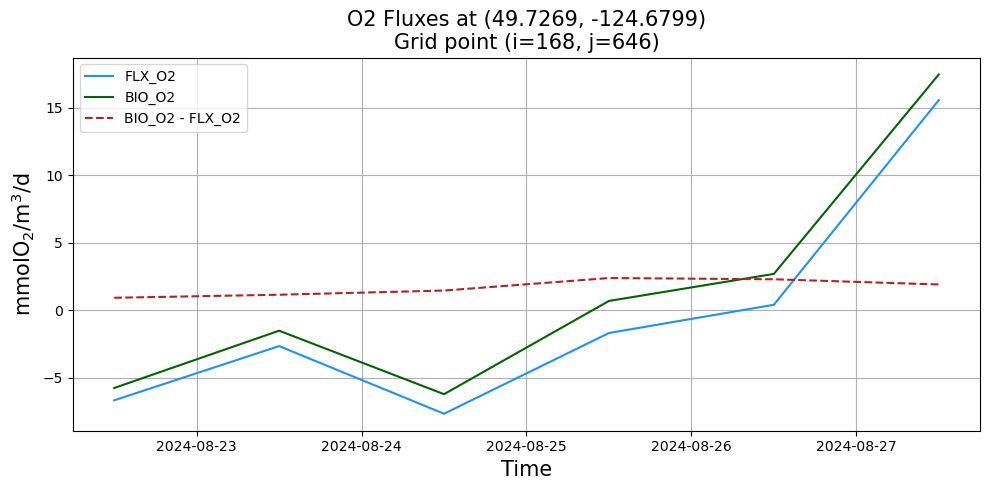

In [7]:
target_lat = 49.7269
target_lon = -124.6799

grid_path = '/ocean/atall/MOAD/grid/mesh_mask_202310b.nc'
with xr.open_dataset(grid_path) as mesh:
    nav_lat = mesh.nav_lat
    nav_lon = mesh.nav_lon

dist = np.sqrt((nav_lat - target_lat)**2 + (nav_lon - target_lon)**2)
j, i = np.unravel_index(dist.argmin(), dist.shape)
print(f"Closest grid point: i={i}, j={j}, lat={nav_lat.values[j, i]}, lon={nav_lon.values[j, i]}")

base_dir = Path('/ocean/atall/MOAD/Model/202410b/SalishSeaCast_hourly_prod')
dates = ['22aug24', '23aug24', '24aug24', '25aug24', '26aug24', '27aug24']
file_paths = [
    base_dir / d / f"SalishSea_1d_202408{d[:2]}_202408{d[:2]}_diag_T.nc"
    for d in dates
]

ds = xr.open_mfdataset(file_paths, combine='by_coords')

flx_ts = ds['FLX_O2'][:, 0, j, i]
bio_ts = ds['BIO_O2'][:, 0, j, i]
diff_ts = bio_ts - flx_ts
time = ds['time_counter']

# --- Plot ---
conv = 86400
plt.figure(figsize=(10, 5))
plt.plot(time, flx_ts*conv, label='FLX_O2', color='dodgerblue')
plt.plot(time, bio_ts*conv, label='BIO_O2', color='darkgreen')
plt.plot(time, diff_ts*conv, label='BIO_O2 - FLX_O2', color='firebrick', linestyle='--')

plt.title(f'O2 Fluxes at ({target_lat}, {target_lon})\nGrid point (i={i}, j={j})', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('mmolO$_2$/m$^3$/d', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
base_dir = Path('/ocean/atall/MOAD/Model/202410b/SalishSeaCast_hourly_prod')
dates = ['22aug24', '23aug24', '24aug24', '25aug24', '26aug24', '27aug24']
file_paths = [
    base_dir / d / f"SalishSea_1d_202408{d[:2]}_202408{d[:2]}_diag_T.nc"
    for d in dates
]

ds = xr.open_mfdataset(file_paths, combine='by_coords')
var = 'FLX_O2' 

depth_level = 0
data = ds[var].isel(deptht=depth_level)

time = ds['time_counter'].values
vmin = -0.0015
vmax = 0.0015
n_time = data.sizes['time_counter']

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(data.isel(time_counter=0), origin='lower', cmap=cm.balance, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(img, ax=ax, label=f"{var} ({data.units})")
title = ax.set_title(f"{var} — {str(time[0])[:10]}")

def update(frame):
    frame_data = data.isel(time_counter=frame)
    img.set_array(frame_data)
    title.set_text(f"{var} — {str(time[frame])[:10]}")
    return [img, title]


anim = FuncAnimation(fig, update, frames=n_time, interval=800, blit=False)
plt.close(fig)

HTML(anim.to_jshtml()) 

Closest grid point: i=168, j=646, lat=49.725547790527344, lon=-124.67886352539062


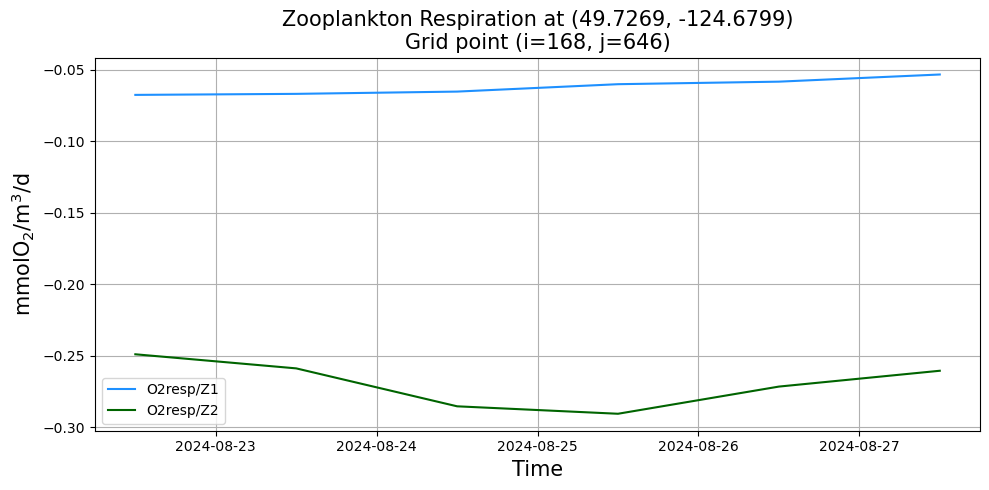

In [ ]:
target_lat = 49.7269
target_lon = -124.6799

grid_path = '/ocean/atall/MOAD/grid/mesh_mask_202310b.nc'
with xr.open_dataset(grid_path) as mesh:
    nav_lat = mesh.nav_lat
    nav_lon = mesh.nav_lon

dist = np.sqrt((nav_lat - target_lat)**2 + (nav_lon - target_lon)**2)
j, i = np.unravel_index(dist.argmin(), dist.shape)
print(f"Closest grid point: i={i}, j={j}, lat={nav_lat.values[j, i]}, lon={nav_lon.values[j, i]}")

base_dir = Path('/ocean/atall/MOAD/Model/202410b/SalishSeaCast_hourly_prod')
dates = ['22aug24', '23aug24', '24aug24', '25aug24', '26aug24', '27aug24']
file_paths = [
    base_dir / d / f"SalishSea_1d_202408{d[:2]}_202408{d[:2]}_diag_T.nc"
    for d in dates
]

ds = xr.open_mfdataset(file_paths, combine='by_coords')


z1_ts = ds['MIZ_O2'][:, :5, j, i].mean(axis=1) # mean first 5 meters
z2_ts = ds['MSZ_O2'][:, :5, j, i].mean(axis=1)

time = ds['time_counter']

# --- Plot ---
conv = 86400
plt.figure(figsize=(10, 5))
plt.plot(time, z1_ts*conv, label='O2resp/Z1', color='dodgerblue')
plt.plot(time, z2_ts*conv, label='O2resp/Z2', color='darkgreen')

plt.title(f'Zooplankton Respiration at ({target_lat}, {target_lon})\nGrid point (i={i}, j={j})', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('mmolO$_2$/m$^3$/d', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()